In [1]:
import tensorflow

2022-11-16 15:56:33.491874: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-11-16 15:56:33.809658: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-11-16 15:56:33.809690: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2022-11-16 15:56:33.861070: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2022-11-16 15:56:35.341838: W tensorflow/stream_executor/platform/de

In [2]:
import numpy

In [27]:
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.models import Model

In [4]:
(x_train, y_train),(x_test,y_test) = tensorflow.keras.datasets.cifar10.load_data()

In [5]:
print(len(x_train))
print(len(y_train))
print(len(x_test))
print(len(y_test))
x_train = numpy.array(x_train)
x_test = numpy.array(x_test)

50000
50000
10000
10000


In [6]:
import matplotlib.pyplot as plt

In [7]:
print(x_train[0])
print(y_train[0])

[[[ 59  62  63]
  [ 43  46  45]
  [ 50  48  43]
  ...
  [158 132 108]
  [152 125 102]
  [148 124 103]]

 [[ 16  20  20]
  [  0   0   0]
  [ 18   8   0]
  ...
  [123  88  55]
  [119  83  50]
  [122  87  57]]

 [[ 25  24  21]
  [ 16   7   0]
  [ 49  27   8]
  ...
  [118  84  50]
  [120  84  50]
  [109  73  42]]

 ...

 [[208 170  96]
  [201 153  34]
  [198 161  26]
  ...
  [160 133  70]
  [ 56  31   7]
  [ 53  34  20]]

 [[180 139  96]
  [173 123  42]
  [186 144  30]
  ...
  [184 148  94]
  [ 97  62  34]
  [ 83  53  34]]

 [[177 144 116]
  [168 129  94]
  [179 142  87]
  ...
  [216 184 140]
  [151 118  84]
  [123  92  72]]]
[6]


In [8]:
x_train = x_train/225
x_test = x_test/225

In [9]:
print(x_train[0])
print(y_train[0])

[[[0.26222222 0.27555556 0.28      ]
  [0.19111111 0.20444444 0.2       ]
  [0.22222222 0.21333333 0.19111111]
  ...
  [0.70222222 0.58666667 0.48      ]
  [0.67555556 0.55555556 0.45333333]
  [0.65777778 0.55111111 0.45777778]]

 [[0.07111111 0.08888889 0.08888889]
  [0.         0.         0.        ]
  [0.08       0.03555556 0.        ]
  ...
  [0.54666667 0.39111111 0.24444444]
  [0.52888889 0.36888889 0.22222222]
  [0.54222222 0.38666667 0.25333333]]

 [[0.11111111 0.10666667 0.09333333]
  [0.07111111 0.03111111 0.        ]
  [0.21777778 0.12       0.03555556]
  ...
  [0.52444444 0.37333333 0.22222222]
  [0.53333333 0.37333333 0.22222222]
  [0.48444444 0.32444444 0.18666667]]

 ...

 [[0.92444444 0.75555556 0.42666667]
  [0.89333333 0.68       0.15111111]
  [0.88       0.71555556 0.11555556]
  ...
  [0.71111111 0.59111111 0.31111111]
  [0.24888889 0.13777778 0.03111111]
  [0.23555556 0.15111111 0.08888889]]

 [[0.8        0.61777778 0.42666667]
  [0.76888889 0.54666667 0.18666667]


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
/home/theus/.local/miniconda3/lib/python3.9/site-packages/matplotlib/text.py:1241: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).

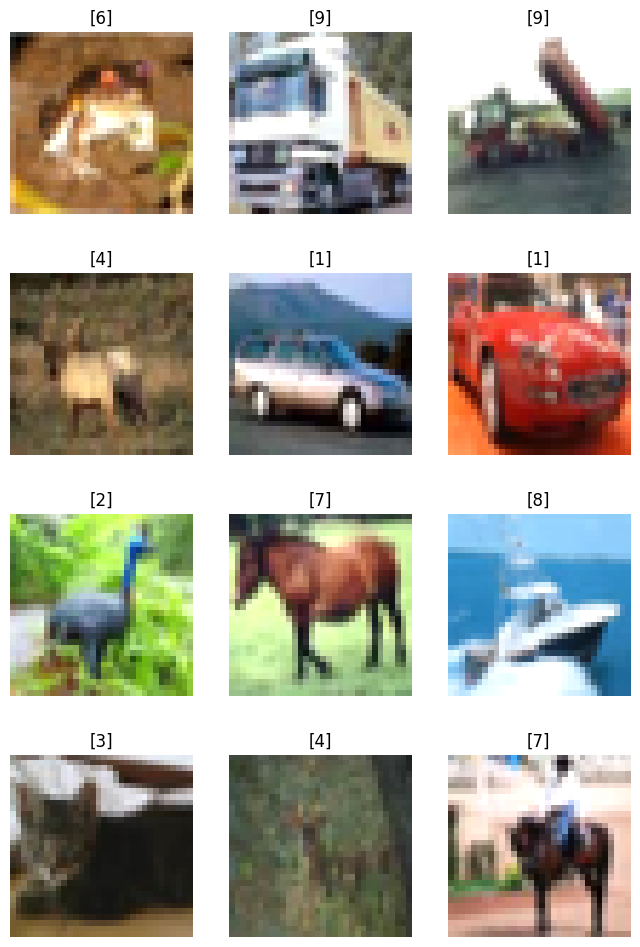

In [10]:
fig = plt.figure(figsize=(8.0,12.0))
rows=4
columns=3
for i in range(rows*columns):
    fig.add_subplot(rows,columns,i+1)
    plt.imshow(x_train[i])
    plt.title(y_train[i])
    plt.axis("off")

In [11]:
x_train.shape

(50000, 32, 32, 3)

In [38]:
head = tensorflow.keras.applications.EfficientNetB0(include_top=False, input_shape=(32,32,3))

In [39]:
for layer in head.layers:
    layer.trainable = False

In [40]:
head.summary()

Model: "efficientnetb0"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_5 (InputLayer)           [(None, 32, 32, 3)]  0           []                               
                                                                                                  
 rescaling_8 (Rescaling)        (None, 32, 32, 3)    0           ['input_5[0][0]']                
                                                                                                  
 normalization_4 (Normalization  (None, 32, 32, 3)   7           ['rescaling_8[0][0]']            
 )                                                                                                
                                                                                                  
 rescaling_9 (Rescaling)        (None, 32, 32, 3)    0           ['normalization_4[0]

 block2b_expand_conv (Conv2D)   (None, 8, 8, 144)    3456        ['block2a_project_bn[0][0]']     
                                                                                                  
 block2b_expand_bn (BatchNormal  (None, 8, 8, 144)   576         ['block2b_expand_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 block2b_expand_activation (Act  (None, 8, 8, 144)   0           ['block2b_expand_bn[0][0]']      
 ivation)                                                                                         
                                                                                                  
 block2b_dwconv (DepthwiseConv2  (None, 8, 8, 144)   1296        ['block2b_expand_activation[0][0]
 D)                                                              ']                               
          

                                                                                                  
 block3b_dwconv (DepthwiseConv2  (None, 4, 4, 240)   6000        ['block3b_expand_activation[0][0]
 D)                                                              ']                               
                                                                                                  
 block3b_bn (BatchNormalization  (None, 4, 4, 240)   960         ['block3b_dwconv[0][0]']         
 )                                                                                                
                                                                                                  
 block3b_activation (Activation  (None, 4, 4, 240)   0           ['block3b_bn[0][0]']             
 )                                                                                                
                                                                                                  
 block3b_s

 block4b_activation (Activation  (None, 2, 2, 480)   0           ['block4b_bn[0][0]']             
 )                                                                                                
                                                                                                  
 block4b_se_squeeze (GlobalAver  (None, 480)         0           ['block4b_activation[0][0]']     
 agePooling2D)                                                                                    
                                                                                                  
 block4b_se_reshape (Reshape)   (None, 1, 1, 480)    0           ['block4b_se_squeeze[0][0]']     
                                                                                                  
 block4b_se_reduce (Conv2D)     (None, 1, 1, 20)     9620        ['block4b_se_reshape[0][0]']     
                                                                                                  
 block4b_s

                                                                                                  
 block5a_se_reshape (Reshape)   (None, 1, 1, 480)    0           ['block5a_se_squeeze[0][0]']     
                                                                                                  
 block5a_se_reduce (Conv2D)     (None, 1, 1, 20)     9620        ['block5a_se_reshape[0][0]']     
                                                                                                  
 block5a_se_expand (Conv2D)     (None, 1, 1, 480)    10080       ['block5a_se_reduce[0][0]']      
                                                                                                  
 block5a_se_excite (Multiply)   (None, 2, 2, 480)    0           ['block5a_activation[0][0]',     
                                                                  'block5a_se_expand[0][0]']      
                                                                                                  
 block5a_p

 block5c_project_conv (Conv2D)  (None, 2, 2, 112)    75264       ['block5c_se_excite[0][0]']      
                                                                                                  
 block5c_project_bn (BatchNorma  (None, 2, 2, 112)   448         ['block5c_project_conv[0][0]']   
 lization)                                                                                        
                                                                                                  
 block5c_drop (Dropout)         (None, 2, 2, 112)    0           ['block5c_project_bn[0][0]']     
                                                                                                  
 block5c_add (Add)              (None, 2, 2, 112)    0           ['block5c_drop[0][0]',           
                                                                  'block5b_add[0][0]']            
                                                                                                  
 block6a_e

 block6b_add (Add)              (None, 1, 1, 192)    0           ['block6b_drop[0][0]',           
                                                                  'block6a_project_bn[0][0]']     
                                                                                                  
 block6c_expand_conv (Conv2D)   (None, 1, 1, 1152)   221184      ['block6b_add[0][0]']            
                                                                                                  
 block6c_expand_bn (BatchNormal  (None, 1, 1, 1152)  4608        ['block6c_expand_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 block6c_expand_activation (Act  (None, 1, 1, 1152)  0           ['block6c_expand_bn[0][0]']      
 ivation)                                                                                         
          

 block7a_expand_bn (BatchNormal  (None, 1, 1, 1152)  4608        ['block7a_expand_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 block7a_expand_activation (Act  (None, 1, 1, 1152)  0           ['block7a_expand_bn[0][0]']      
 ivation)                                                                                         
                                                                                                  
 block7a_dwconv (DepthwiseConv2  (None, 1, 1, 1152)  10368       ['block7a_expand_activation[0][0]
 D)                                                              ']                               
                                                                                                  
 block7a_bn (BatchNormalization  (None, 1, 1, 1152)  4608        ['block7a_dwconv[0][0]']         
 )        

In [41]:
top = Flatten()(head.output)

In [42]:
top = Dense(256, activation='relu')(top)
top = Dense(10, activation='sigmoid')(top)

In [43]:
model = Model(inputs = head.input, outputs = top)

In [44]:
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_5 (InputLayer)           [(None, 32, 32, 3)]  0           []                               
                                                                                                  
 rescaling_8 (Rescaling)        (None, 32, 32, 3)    0           ['input_5[0][0]']                
                                                                                                  
 normalization_4 (Normalization  (None, 32, 32, 3)   7           ['rescaling_8[0][0]']            
 )                                                                                                
                                                                                                  
 rescaling_9 (Rescaling)        (None, 32, 32, 3)    0           ['normalization_4[0][0]']  

 block2b_expand_conv (Conv2D)   (None, 8, 8, 144)    3456        ['block2a_project_bn[0][0]']     
                                                                                                  
 block2b_expand_bn (BatchNormal  (None, 8, 8, 144)   576         ['block2b_expand_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 block2b_expand_activation (Act  (None, 8, 8, 144)   0           ['block2b_expand_bn[0][0]']      
 ivation)                                                                                         
                                                                                                  
 block2b_dwconv (DepthwiseConv2  (None, 8, 8, 144)   1296        ['block2b_expand_activation[0][0]
 D)                                                              ']                               
          

                                                                                                  
 block3b_dwconv (DepthwiseConv2  (None, 4, 4, 240)   6000        ['block3b_expand_activation[0][0]
 D)                                                              ']                               
                                                                                                  
 block3b_bn (BatchNormalization  (None, 4, 4, 240)   960         ['block3b_dwconv[0][0]']         
 )                                                                                                
                                                                                                  
 block3b_activation (Activation  (None, 4, 4, 240)   0           ['block3b_bn[0][0]']             
 )                                                                                                
                                                                                                  
 block3b_s

 block4b_activation (Activation  (None, 2, 2, 480)   0           ['block4b_bn[0][0]']             
 )                                                                                                
                                                                                                  
 block4b_se_squeeze (GlobalAver  (None, 480)         0           ['block4b_activation[0][0]']     
 agePooling2D)                                                                                    
                                                                                                  
 block4b_se_reshape (Reshape)   (None, 1, 1, 480)    0           ['block4b_se_squeeze[0][0]']     
                                                                                                  
 block4b_se_reduce (Conv2D)     (None, 1, 1, 20)     9620        ['block4b_se_reshape[0][0]']     
                                                                                                  
 block4b_s

                                                                                                  
 block5a_se_reshape (Reshape)   (None, 1, 1, 480)    0           ['block5a_se_squeeze[0][0]']     
                                                                                                  
 block5a_se_reduce (Conv2D)     (None, 1, 1, 20)     9620        ['block5a_se_reshape[0][0]']     
                                                                                                  
 block5a_se_expand (Conv2D)     (None, 1, 1, 480)    10080       ['block5a_se_reduce[0][0]']      
                                                                                                  
 block5a_se_excite (Multiply)   (None, 2, 2, 480)    0           ['block5a_activation[0][0]',     
                                                                  'block5a_se_expand[0][0]']      
                                                                                                  
 block5a_p

 block5c_project_conv (Conv2D)  (None, 2, 2, 112)    75264       ['block5c_se_excite[0][0]']      
                                                                                                  
 block5c_project_bn (BatchNorma  (None, 2, 2, 112)   448         ['block5c_project_conv[0][0]']   
 lization)                                                                                        
                                                                                                  
 block5c_drop (Dropout)         (None, 2, 2, 112)    0           ['block5c_project_bn[0][0]']     
                                                                                                  
 block5c_add (Add)              (None, 2, 2, 112)    0           ['block5c_drop[0][0]',           
                                                                  'block5b_add[0][0]']            
                                                                                                  
 block6a_e

 block6b_add (Add)              (None, 1, 1, 192)    0           ['block6b_drop[0][0]',           
                                                                  'block6a_project_bn[0][0]']     
                                                                                                  
 block6c_expand_conv (Conv2D)   (None, 1, 1, 1152)   221184      ['block6b_add[0][0]']            
                                                                                                  
 block6c_expand_bn (BatchNormal  (None, 1, 1, 1152)  4608        ['block6c_expand_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 block6c_expand_activation (Act  (None, 1, 1, 1152)  0           ['block6c_expand_bn[0][0]']      
 ivation)                                                                                         
          

 block7a_expand_bn (BatchNormal  (None, 1, 1, 1152)  4608        ['block7a_expand_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 block7a_expand_activation (Act  (None, 1, 1, 1152)  0           ['block7a_expand_bn[0][0]']      
 ivation)                                                                                         
                                                                                                  
 block7a_dwconv (DepthwiseConv2  (None, 1, 1, 1152)  10368       ['block7a_expand_activation[0][0]
 D)                                                              ']                               
                                                                                                  
 block7a_bn (BatchNormalization  (None, 1, 1, 1152)  4608        ['block7a_dwconv[0][0]']         
 )        

In [45]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics='accuracy')

In [46]:
hist = model.fit(x=x_train, y=y_train, batch_size=32, epochs=10)

Epoch 1/10
 202/1563 [==>...........................] - ETA: 1:21 - loss: 2.3265 - accuracy: 0.0916

KeyboardInterrupt: 

In [119]:
history = model.evaluate(x=x_test,y=y_test)

313/313 [==============================] - 2s 4ms/step - loss: 0.0991 - accuracy: 0.9808


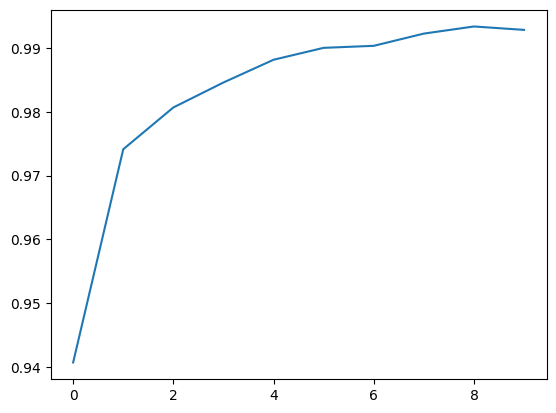

In [122]:
plt.plot(hist.epoch, hist.history['accuracy'])

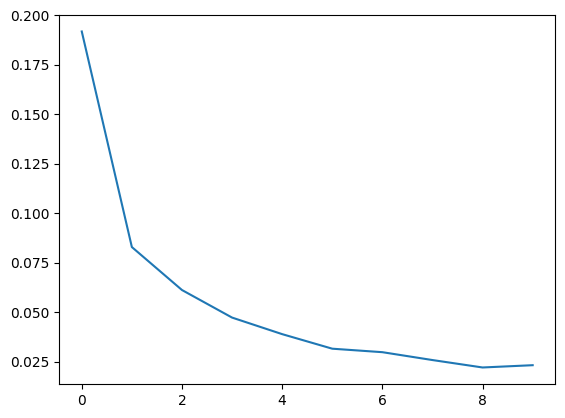

In [123]:
plt.plot(hist.epoch, hist.history['loss'])

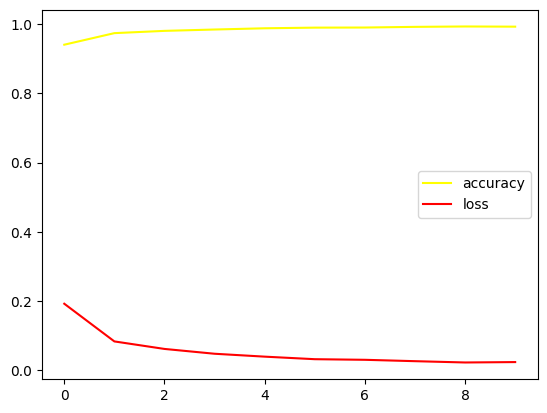

In [125]:
plt.plot(hist.history['accuracy'], c='yellow')
plt.plot(hist.history['loss'], c='red')
plt.legend(['accuracy','loss'])